In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Data2/target_golmok.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,17,1678722741,9.874840e+07
1,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000016,자하문로7길,60,34115456247,5.685909e+08
2,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000027,필운대로1길,29,5736954304,1.978260e+08
3,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000007,북촌로5길,88,116149167487,1.319877e+09
4,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000008,북촌로5나길,58,92170452126,1.589146e+09


In [3]:
data.shape

(32190, 13)

### 32개 있는 데이터만 고르기

In [4]:
from module.outlier import thirtyTwoTwo

data=thirtyTwoTwo(data)
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,17,1678722741,9.874840e+07
1,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000016,자하문로7길,60,34115456247,5.685909e+08
2,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000027,필운대로1길,29,5736954304,1.978260e+08
3,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000007,북촌로5길,88,116149167487,1.319877e+09
4,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000008,북촌로5나길,58,92170452126,1.589146e+09


In [5]:
data.shape

(31904, 13)

In [6]:
data.sort_values(by=['기준_년_코드','기준_분기_코드'],inplace=True)
data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,17,1678722741,9.874840e+07
1,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000016,자하문로7길,60,34115456247,5.685909e+08
2,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000027,필운대로1길,29,5736954304,1.978260e+08
3,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000007,북촌로5길,88,116149167487,1.319877e+09
4,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000008,북촌로5나길,58,92170452126,1.589146e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32185,2021,4,A,골목상권,11740,강동구,11740685,길동,1001000,진황도로47길,55,24690416950,4.489167e+08
32186,2021,4,A,골목상권,11740,강동구,11740685,길동,1001005,천호대로187길,36,26529328344,7.369258e+08
32187,2021,4,A,골목상권,11740,강동구,11740685,길동,1001006,천호대로197길,20,3158315537,1.579158e+08
32188,2021,4,A,골목상권,11740,강동구,11740700,둔촌2동,1000977,명일로13길,43,21065028478,4.898844e+08


### 서비스 업종별로의 분포 보기

In [84]:
# plt.style.use('ggplot')

# # for service in data['상권_코드_명'].unique():
# #     test=data[data['상권_코드_명'] == service]
# test = data
# test.sort_values(by=['기준_년_코드','기준_분기_코드'],inplace=True)
# test.reset_index(inplace=True,drop=True)

# sns.swarmplot(
#     x='시군구명',
#     y='점포매출액',
#     data=test
# )

# plt.title(f'매출액 분포')

# plt.xticks(rotation=90)

# plt.show()

In [7]:
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,17,1678722741,9.874840e+07
1,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000016,자하문로7길,60,34115456247,5.685909e+08
2,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000027,필운대로1길,29,5736954304,1.978260e+08
3,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000007,북촌로5길,88,116149167487,1.319877e+09
4,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000008,북촌로5나길,58,92170452126,1.589146e+09


In [8]:
data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,17,1678722741,9.874840e+07
1,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000016,자하문로7길,60,34115456247,5.685909e+08
2,2014,1,A,골목상권,11110,종로구,11110530,사직동,1000027,필운대로1길,29,5736954304,1.978260e+08
3,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000007,북촌로5길,88,116149167487,1.319877e+09
4,2014,1,A,골목상권,11110,종로구,11110540,삼청동,1000008,북촌로5나길,58,92170452126,1.589146e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32185,2021,4,A,골목상권,11740,강동구,11740685,길동,1001000,진황도로47길,55,24690416950,4.489167e+08
32186,2021,4,A,골목상권,11740,강동구,11740685,길동,1001005,천호대로187길,36,26529328344,7.369258e+08
32187,2021,4,A,골목상권,11740,강동구,11740685,길동,1001006,천호대로197길,20,3158315537,1.579158e+08
32188,2021,4,A,골목상권,11740,강동구,11740700,둔촌2동,1000977,명일로13길,43,21065028478,4.898844e+08


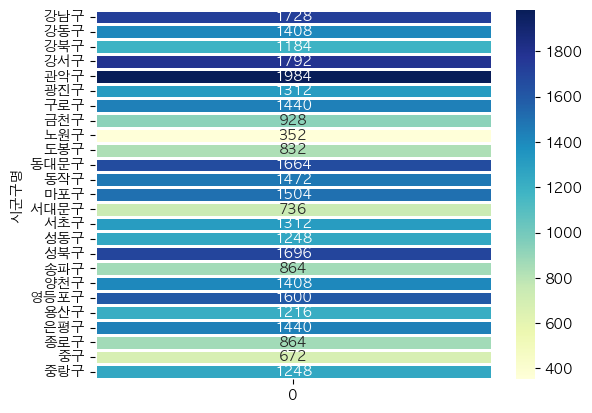

In [9]:
table=data.pivot_table(index=['시군구명'],aggfunc='size')
sns.heatmap(
	pd.DataFrame(table),
    annot=True,
	fmt='d',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

# plt.yticks(labels=['골목시장','관광특구','발달상권','전통시장'],ticks=[0.5,1.5,2.5,3.5])

# plt.xticks(labels=['데이터 수'],ticks=[0.5])

plt.show()

### 데이터 수가 가장 많은 관악구로 설정 탕탕탕

In [10]:
data=data[data['시군구명'] == '관악구']
data.to_csv('./Data2/target_gwanak.csv',index=False)